In [1]:
%pylab inline

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [5]:
# Perfect sensor for x-axis motion
def sense_x(x):
    return x

In [6]:
# Perfector sensor for y-axis motion
def sense_y(y):
    return y

In [30]:
# Need to break our simulation into an x part and a y part
def simulate(Δt, x, y, u):
    x += Δt * u[0]
    y += Δt * u[1]
    return [x, y]

In [121]:
# For this control policy we want to create a simple p controller instead
# To set up the controller we need
# A sensor to calculate the current distance
# Some desired distance

k = 10

def control(y, x):
    # Gain Value
    # Desired position
    Xd = 2
    Yd = 10
    ux = (x - Xd) * k * -1
    uy = (y - Yd) * k * -1
#    print("ux: " + str(ux))
    return [ux, uy]

In [122]:
tf = 5.
Δt = 0.1    # Time step
time = linspace(0.,tf, int(tf / Δt) + 1)  # Time interval


# Initial conditions
x = 4.
y = 5.
x_log = [copy(x)]
y_log = [copy(y)]
for t in time:
#    print("x value: " + str(x))
    x_curr = sense_x(x)
    y_curr = sense_y(y)
    u = control(y_curr, x_curr) 
    temp = simulate(Δt, x, y, u)
   # print("temp: " + str(temp))
    x = temp[0]
    y = temp[1]
    x_log.append(copy(x))
    y_log.append(copy(y))
    
    
x_log = array(x_log)
y_log = array(y_log)

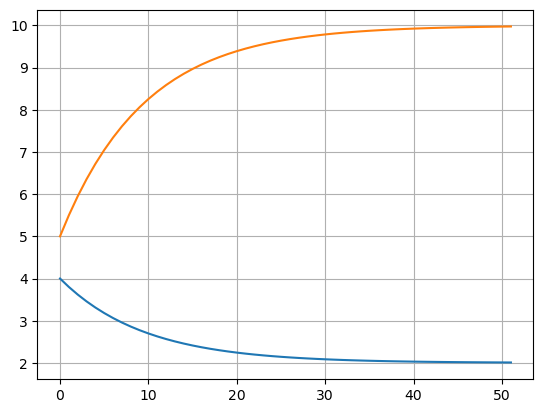

In [117]:
# k value 1
grid()
plot(x_log)
plot(y_log)

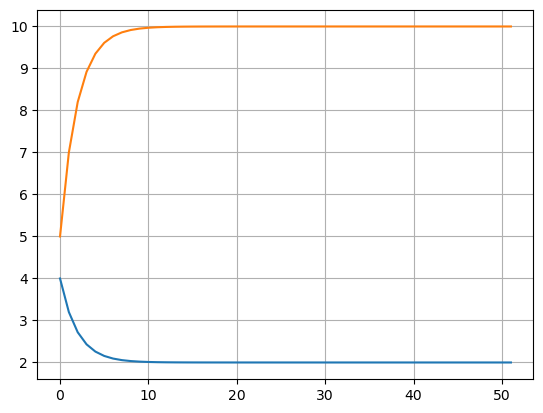

In [120]:
# k value 4
grid()
plot(x_log)
plot(y_log)

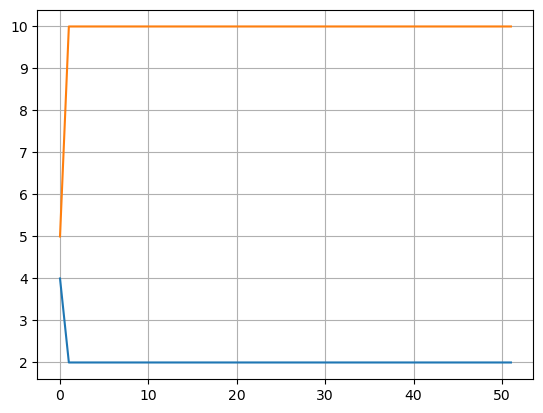

In [123]:
# k value 10
grid()
plot(x_log)
plot(y_log)